In [1]:

import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import copy
from IPython.display import clear_output
from matplotlib.ticker import FormatStrFormatter
from scipy.stats import expon, norm, pearsonr
#from sklearn.linear_model import LogisticRegression
#from tqdm.notebook import tqdm

In [28]:
import PIPPET
import utils


import importlib
importlib.reload(PIPPET)
importlib.reload(utils)


TWO_PI = 2*np.pi

In [3]:
def _plot(m, figsize=(12, 6), width_ratios=(1, 5), title='', xlim=None):
    # Config and palette
    plt.rcParams['font.size'] = 11
    plt.rcParams["font.family"] = "Arial"
    cs = sns.color_palette('tab10', 2)

    # Create the grid
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(1, 2,  width_ratios=width_ratios)
    ax = fig.add_subplot(gs[0, 1])
    ax_temp = fig.add_subplot(gs[0, 0], sharey=ax)

    # Phase progress
    std = 2*np.sqrt(m.V_s)
    ax.plot(m.ts, m.mu_s, c=cs[0], linewidth=1.75, label='Est. phase, '+r'$\mu_t$')
    ax.fill_between(m.ts, m.mu_s-std, m.mu_s+std, alpha=0.2, facecolor=cs[0],
                    label='Est. variance, '+r'$4\sqrt{V_t}$')
    ax.set_xlabel('Time')

    # Templates
    ts = np.arange(-np.pi, np.pi, m.params.dt)
    stream = m.streams[0].params
    temp = m.streams[0].params.lambda_0 + np.zeros(np.shape(stream.e_lambdas[0]))
    for i in range(stream.e_means.size):
        pdf = norm.pdf(ts, loc=stream.e_means[i], scale=(stream.e_vars[i])**0.5)
        pdf2 = norm.pdf(ts, loc=stream.e_means[i]-TWO_PI, scale=(stream.e_vars[i])**0.5)
        
        temp = temp + stream.e_lambdas[i]*pdf + stream.e_lambdas[i]*pdf2
        
    #ax_temp.plot(np.log(temp), ts, c=cs[1], label=m.labels[0])
    #ax_temp.set_xlabel('Log Expectation log(λ(Φ))')
    ax_temp.plot(np.log(temp), ts, c="black", label=m.labels[0])
    ax_temp.set_xlabel('Log Expectation log(λ(Φ))')
    ax_temp.set_ylabel('Phase Φ')

    # Stimulus/Auditory events
    for i in set(m.idx_event):
        ax.axvline(m.ts[i], color='black', alpha=0.55, linestyle='--', linewidth=1,
                   label='Auditory event')

    ax.axhline(0.0, color='black', alpha=0.55, linestyle='--', linewidth=1)
    ax_temp.axhline(0.0, color='black', alpha=0.55, linestyle='--', linewidth=1)
    ax.axhline(-np.pi/2, color='black', alpha=0.55, linestyle='--', linewidth=1)
    ax.axhline(np.pi/2, color='black', alpha=0.55, linestyle='--', linewidth=1)
    ax_temp.axhline(-np.pi/2, color='black', alpha=0.55, linestyle='--', linewidth=1)
    ax_temp.axhline(np.pi/2, color='black', alpha=0.55, linestyle='--', linewidth=1)

    # Axis labels + formatting
    if xlim:
        ax.set_xlim(xlim)
    else:
        ax.set_xlim([m.params.t0, m.tmax + 0.1])
    ax.set_ylim([-np.pi, np.pi])

    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax_temp.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.setp(ax.get_yticklabels(), visible=False)
    plt.tight_layout()
    
    if title:
        ax.set_title(title)

    # Show/Save
    plt.show()

# WATIPPET Responses

In [4]:

def plot_vcPATIPPET(m,start_event, focal_event, end_event, focal_label, tempo_range):
    e_is = list(sorted(m.idx_event))
    from_i=e_is[start_event]-100
    
    to_i=e_is[end_event]+200
    cs = sns.color_palette('bright', 2)
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    std = 2*np.sqrt(m.V_s[from_i:to_i])
    theta_std = 2*np.sqrt(m.V_thetas[from_i:to_i])
    
    axs[0].plot(m.ts[from_i:to_i], m.mu_s[from_i:to_i], c=cs[0], linewidth=1.75, label='Est. phase')
    axs[0].fill_between(m.ts[from_i:to_i], m.mu_s[from_i:to_i]-std, m.mu_s[from_i:to_i]+std, alpha=0.2, facecolor=cs[0],
                    label='Est. variance')
    axs[0].set_yticks([-np.pi, 0, np.pi])
    axs[0].set_yticklabels([r'$-\pi$', r'$0$', r'$\pi$'])

 
      #axs[1].plot(m.ts, abs(m.z_s))
      #axs[1].set_title(r'$|z|$')
    
    axs[1].plot(m.ts[from_i:to_i], m.theta_bars[from_i:to_i], linewidth=1.75, label='Est. tempo')
    axs[1].fill_between(m.ts[from_i:to_i], m.theta_bars[from_i:to_i]-theta_std, m.theta_bars[from_i:to_i]+theta_std, alpha=0.2, facecolor=cs[0],
                    label='Est. tempo variance')
    axs[1].set_title(r'$\bar{\theta}$')
    if tempo_range != None:
        axs[1].set_ylim(tempo_range)

    axs[2].plot(m.ts[from_i:to_i], m.S[from_i:to_i].real)
    axs[2].set_title(r'$S$')


    for ax in axs:
        for i in range(start_event, end_event+1):
            if i==focal_event:
                ax.axvline(m.ts[e_is[i]], -np.pi, np.pi, c='red', lw=2, ls='--', label=focal_label)
            else:
                ax.axvline(m.ts[e_is[i]], -np.pi, np.pi, c='orange', lw=2, ls='--')

    return fig
    





0.81
Running WIPPET... (n=0)
0.8357831007808874
Running WIPPET... (n=1)
0.54
Running WIPPET... (n=2)
0.5657831007808873
Running WIPPET... (n=3)
0.4049999999999998
Running WIPPET... (n=4)
0.4049999999999998
Running WIPPET... (n=5)
0.43078310078088755
Running WIPPET... (n=6)
0.43078310078088755
Running WIPPET... (n=7)
1.08
Running WIPPET... (n=0)
1.1143774677078495
Running WIPPET... (n=1)
0.7200000000000002
Running WIPPET... (n=2)
0.7543774677078496
Running WIPPET... (n=3)
0.54
Running WIPPET... (n=4)
0.54
Running WIPPET... (n=5)
0.5743774677078499
Running WIPPET... (n=6)
0.5743774677078499
Running WIPPET... (n=7)
[0.0001 0.0025 0.0004 0.0025]


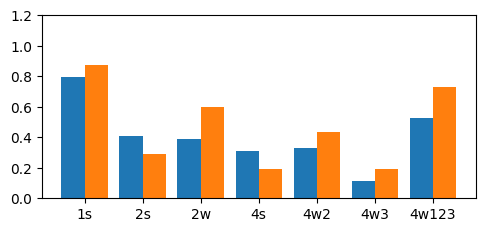

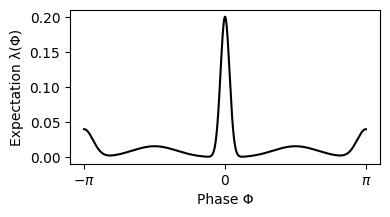

In [26]:

p_ = PIPPET.PIPPETParams()
p_.dt = 0.0005
p_.overtime = .5

p_.mu_0 = 0
p_.V_0 = .01
p_.lambda_0 = 0#0.01

p_.sigma_phi = 0.4

p_.tempo_scaling = True

#0.00012346 0.00246914 0.00037037 0.00246914

#strong_var = .01
strong_var = 0.0001
strong_lambda = .05

#med_var = .03
med_var = 0.0004
med_lambda = .02

#weak_var = .2
weak_var = 0.0025
weak_lambda = .02

e_means   = np.array([0,np.pi/2, np.pi, 3*np.pi/2])
#e_vars    = np.array([strong_var, weak_var, med_var, weak_var])/(9**2)
e_vars    = np.array([strong_var, weak_var, med_var, weak_var])
e_lambdas = np.array([strong_lambda, weak_lambda, med_lambda, weak_lambda])



delta = .3

all_e_times = [np.array([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi]),
               np.array([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi-delta]),
               np.array([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi, 6*np.pi, 7*np.pi, 8*np.pi-delta, 9*np.pi]),
               np.array([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi, 6*np.pi, 7*np.pi, 8*np.pi, 9*np.pi-delta]),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi-delta, 17*np.pi/2, 9*np.pi, 19*np.pi/2]))),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2, 9*np.pi-delta, 19*np.pi/2]))),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2, 9*np.pi, 19*np.pi/2-delta]))),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2-delta, 9*np.pi-delta, 19*np.pi/2-delta])))]


labels = ['0', '1s', '2s', '2w', '4s', '4w2', '4w3', '4w123']
all_periods = [.540, .720]

all_last_taps = np.zeros([len(all_periods),len(all_e_times)]) 

alphas = np.zeros([len(all_periods),len(all_e_times)]) 

models = []
for j in range(len(all_periods)):
    for i in range(len(all_e_times)):    
        p_now = copy.deepcopy(p_)
        e_times = all_e_times[i] /(2*np.pi) *all_periods[j]
        #print(e_times)
        p_now.tau = 2*np.pi/all_periods[j]
        
        p_now.overtime = all_periods[j]*5.5-e_times[-1]
        print(p_now.overtime)
        #e_vars_tmp = e_vars * (.54/all_periods[j])**2 ###
        p_now.add(e_times, e_means, e_vars, e_lambdas, p_.lambda_0,'')
        print('Running WIPPET... (n={})'.format(i))
        m = PIPPET.cPIPPET(p_now)
        m.run()
        #utils.plot_everything(m)
        beats = m.ts[np.where(np.logical_and(m.mu_s[1:]>0 , m.mu_s[:-1]<0))]
        if len(beats)>0:
            all_last_taps[j, i] = beats[-1]
        models.append(m)
    alphas[j,:] = (all_last_taps[j,0] - all_last_taps[j,:])  /(delta/(2*np.pi) *all_periods[j])

labels = ['0', '1s', '2s', '2w', '4s', '4w2', '4w3', '4w123']
x = np.arange(len(all_e_times)-1)
fig = plt.figure(figsize=(4*1.4, 1.7*1.4))
plt.bar(x, alphas[0,1:], width = .4)
plt.bar(x+.4, alphas[1,1:], width = .4)
plt.xticks(x + .2, labels[1:])
#fig.savefig('figures/fit.png', bbox_inches='tight');
plt.ylim([0,1.2])
fig2 = utils._plot_template(models[0])
#fig2.savefig('figures/fit_template.png', bbox_inches='tight');
print(e_vars)

0.81
Running WIPPET... (n=0)
0.8357831007808874
Running WIPPET... (n=1)
0.54
Running WIPPET... (n=2)
0.5657831007808873
Running WIPPET... (n=3)
0.4049999999999998
Running WIPPET... (n=4)
0.4049999999999998
Running WIPPET... (n=5)
0.43078310078088755
Running WIPPET... (n=6)
0.43078310078088755
Running WIPPET... (n=7)
1.08
Running WIPPET... (n=0)
1.1143774677078495
Running WIPPET... (n=1)
0.7200000000000002
Running WIPPET... (n=2)
0.7543774677078496
Running WIPPET... (n=3)
0.54
Running WIPPET... (n=4)
0.54
Running WIPPET... (n=5)
0.5743774677078499
Running WIPPET... (n=6)
0.5743774677078499
Running WIPPET... (n=7)
[0.0001 0.0025 0.0004 0.0025]


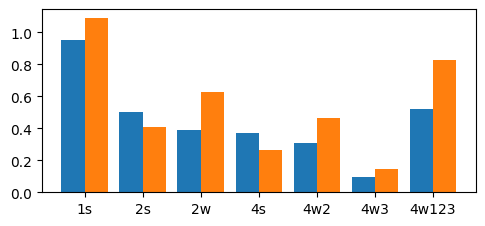

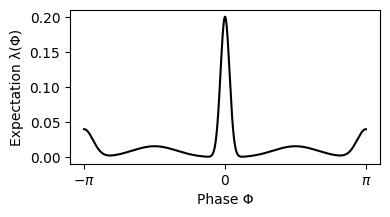

In [40]:


#### CURRENTLY AUTHORITATIVE

p_ = PIPPET.PIPPETParams()
p_.dt = 0.0005
p_.overtime = .5

p_.mu_0 = 0
p_.V_0 = .01
p_.lambda_0 = 0#0.01
p_.eta_mu = 0.0
p_.eta_V = 0.0

p_.sigma_phi = 0.3
p_.sigma_theta = .15#.25#0.12

p_.tau_p = 2*np.pi/.54
p_.tau_p_tendency = 0.00

p_.V_theta_0 = .1
p_.S_0 = 0
p_.theta_0 = 9.5

p_.tempo_scaling = True

#0.00012346 0.00246914 0.00037037 0.00246914

#strong_var = .01
strong_var = 0.0001
strong_lambda = .05

#med_var = .03
med_var = 0.0004
med_lambda = .02

#weak_var = .2
weak_var = 0.0025
weak_lambda = .02

e_means   = np.array([0,np.pi/2, np.pi, 3*np.pi/2])
#e_vars    = np.array([strong_var, weak_var, med_var, weak_var])/(9**2)
e_vars    = np.array([strong_var, weak_var, med_var, weak_var])
e_lambdas = np.array([strong_lambda, weak_lambda, med_lambda, weak_lambda])



delta = .3

all_e_times = [np.array([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi]),
               np.array([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi-delta]),
               np.array([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi, 6*np.pi, 7*np.pi, 8*np.pi-delta, 9*np.pi]),
               np.array([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi, 6*np.pi, 7*np.pi, 8*np.pi, 9*np.pi-delta]),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi-delta, 17*np.pi/2, 9*np.pi, 19*np.pi/2]))),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2, 9*np.pi-delta, 19*np.pi/2]))),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2, 9*np.pi, 19*np.pi/2-delta]))),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2-delta, 9*np.pi-delta, 19*np.pi/2-delta])))]


labels = ['0', '1s', '2s', '2w', '4s', '4w2', '4w3', '4w123']
all_periods = [.540, .720]

all_last_taps = np.zeros([len(all_periods),len(all_e_times)]) 

alphas = np.zeros([len(all_periods),len(all_e_times)]) 

models = []
for j in range(len(all_periods)):
    for i in range(len(all_e_times)):    
        p_now = copy.deepcopy(p_)
        e_times = all_e_times[i] /(2*np.pi) *all_periods[j]
        #print(e_times)
        p_now.theta_0 = 2*np.pi/all_periods[j]
        
        p_now.overtime = all_periods[j]*5.5-e_times[-1]
        print(p_now.overtime)
        #e_vars_tmp = e_vars * (.54/all_periods[j])**2 ###
        p_now.add(e_times, e_means, e_vars, e_lambdas, p_.lambda_0,'')
        print('Running WIPPET... (n={})'.format(i))
        m = PIPPET.vcPATIPPET(p_now)
        m.run()
        #utils.plot_everything(m)
        beats = m.ts[np.where(np.logical_and(m.mu_s[1:]>0 , m.mu_s[:-1]<0))]
        if len(beats)>0:
            all_last_taps[j, i] = beats[-1]
        models.append(m)
    alphas[j,:] = (all_last_taps[j,0] - all_last_taps[j,:])  /(delta/(2*np.pi) *all_periods[j])

labels = ['0', '1s', '2s', '2w', '4s', '4w2', '4w3', '4w123']
x = np.arange(len(all_e_times)-1)
fig = plt.figure(figsize=(4*1.4, 1.7*1.4))
plt.bar(x, alphas[0,1:], width = .4)
plt.bar(x+.4, alphas[1,1:], width = .4)
plt.xticks(x + .2, labels[1:])
#fig.savefig('figures/fit.png', bbox_inches='tight');

fig2 = utils._plot_template(models[0])
#fig2.savefig('figures/fit_template.png', bbox_inches='tight');
print(e_vars)

In [302]:

delta = 0.2
all_e_times = [np.array([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi]),
               np.array([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi-delta]),
               np.array([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi, 6*np.pi, 7*np.pi, 8*np.pi-delta, 9*np.pi]),
               np.array([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi, 6*np.pi, 7*np.pi, 8*np.pi, 9*np.pi-delta])]
               #np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi-delta, 17*np.pi/2, 9*np.pi, 19*np.pi/2]))),
               #np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2, 9*np.pi-delta, 19*np.pi/2]))),
               #np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2, 9*np.pi, 19*np.pi/2-delta]))),
               #np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2-delta, 9*np.pi-delta, 19*np.pi/2-delta])))]
                
p_2 = copy.deepcopy(p_)

p_2.sigma_theta_global = 0#.015# 25#0.12
p_.sigma_phi = 0.3
p_.sigma_theta = .00

strong_var = 0.0001
strong_lambda = .05

med_var = 0.006
med_lambda = .02

weak_var = 0.0025
weak_lambda = 0

e_means   = np.array([0,np.pi/2, np.pi, 3*np.pi/2])
#e_vars    = np.array([strong_var, weak_var, med_var, weak_var])/(9**2)
e_vars    = np.array([strong_var, weak_var, med_var, weak_var])
e_lambdas = np.array([strong_lambda, weak_lambda, med_lambda, weak_lambda])


taus, dtau = np.linspace(1.2*2*np.pi, 2.4*2*np.pi, num=20, retstep = True)

all_last_taps = np.zeros([len(all_periods),len(all_e_times)]) 

alphas = np.zeros([len(all_periods),len(all_e_times)]) 

models = []
for j in range(len(all_periods)):
    for i in range(len(all_e_times)):    
        p_now = copy.deepcopy(p_2)

        e_times = all_e_times[i] /(2*np.pi) *all_periods[j]
        
        p_now.overtime = all_periods[j]*5.5-e_times[-1]
        
        print(p_now.overtime)
        
        p_now.add(e_times, e_means, e_vars, np.array([strong_lambda,0,med_lambda,0]), p_.lambda_0, '')
        print('Running WIPPET... (n={})'.format(i))
        m = PIPPET.gcPATIPPET(p_now, taus=taus)
        m.run()
        #utils.plot_everything(m)
        beats = m.ts[np.where(np.logical_and(m.mu_avg[1:]>0 , m.mu_avg[:-1]<0))]
        if len(beats)>0:
            all_last_taps[j, i] = beats[-1]
        models.append(m)
    alphas[j,:] = (all_last_taps[j,0] - all_last_taps[j,:])  /(delta/(2*np.pi) *all_periods[j])




0.81
Running WIPPET... (n=0)
0.8271887338539248
Running WIPPET... (n=1)
0.54
Running WIPPET... (n=2)
0.5571887338539243
Running WIPPET... (n=3)
1.08
Running WIPPET... (n=0)
1.102918311805233
Running WIPPET... (n=1)
0.7200000000000002
Running WIPPET... (n=2)
0.7429183118052327
Running WIPPET... (n=3)


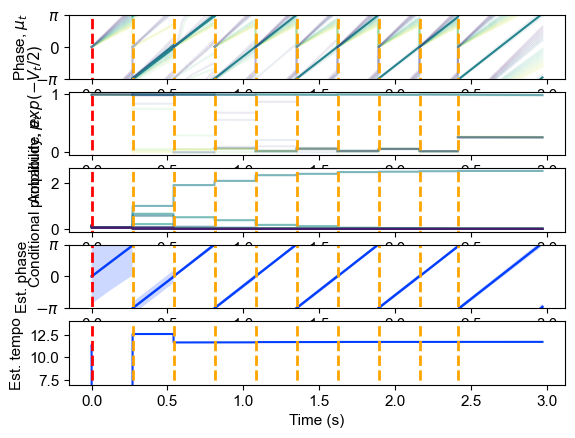

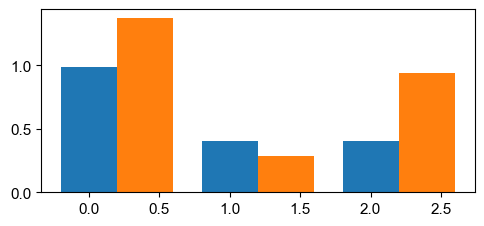

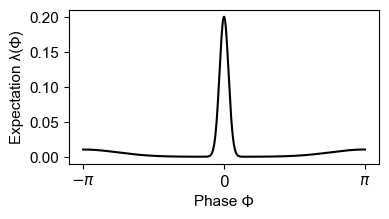

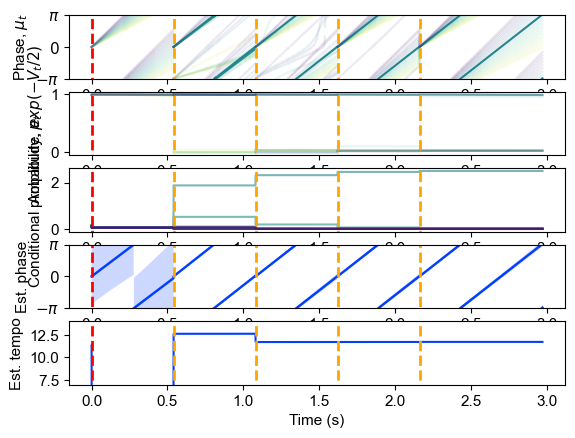

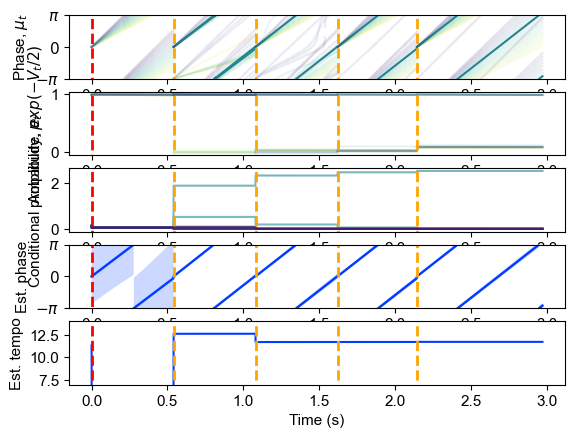

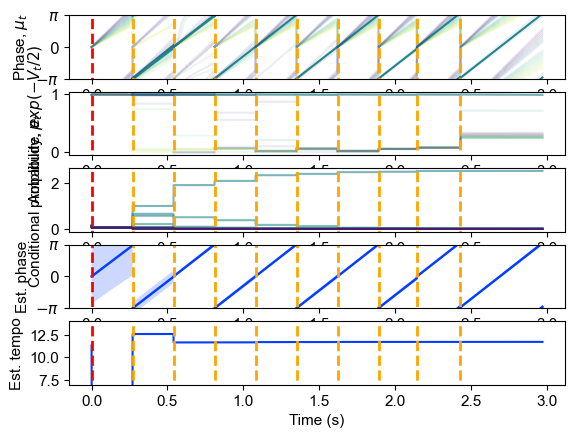

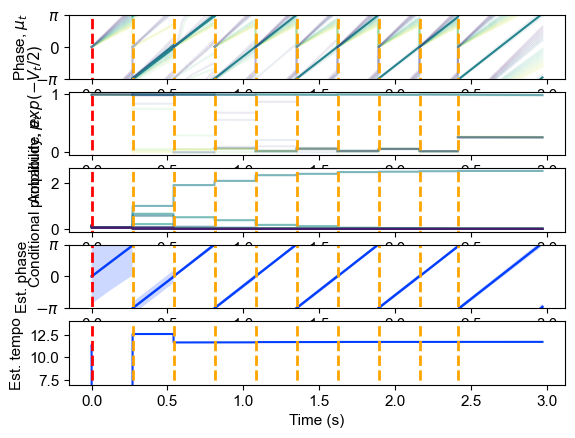

In [303]:
labels = ['0', '1s', '2s', '2w', '4s', '4w2', '4w3', '4w123']
x = np.arange(len(all_e_times)-1)
fig = plt.figure(figsize=(4*1.4, 1.7*1.4))
plt.bar(x, alphas[0,1:], width = .4)
plt.bar(x+.4, alphas[1,1:], width = .4)
#plt.xticks(x + .2, labels[1:3])

fig2 = utils._plot_template(models[0])

utils.plot_gcPATIPPET(models[0], -1, 0, -1, '', .4, [7, 14])
utils.plot_gcPATIPPET(models[1], -1, 0, -1, '', .4, [7, 14])
utils.plot_gcPATIPPET(models[2], -1, 0, -1, '', .4, [7, 14])
utils.plot_gcPATIPPET(models[3], -1, 0, -1, '', .4, [7, 14])



beats

In [228]:
p_2.sigma_theta

0.15

[[2.6995 2.6835 2.6915 2.692  2.6935 2.6935 2.698  2.69  ]
 [3.5995 3.5745 3.5915 3.584  3.594  3.588  3.596  3.5805]]
[[0.         0.93084227 0.46542113 0.43633231 0.34906585 0.34906585
  0.08726646 0.5526876 ]
 [0.         1.09083078 0.34906585 0.67631509 0.23998277 0.50178216
  0.15271631 0.82903139]]


([<matplotlib.axis.XTick at 0x126b01810>,
 [Text(0.2, 0, '1s'),
  Text(1.2, 0, '2s'),
  Text(2.2, 0, '2w'),
  Text(3.2, 0, '4s'),
  Text(4.2, 0, '4w2'),
  Text(5.2, 0, '4w3'),
  Text(6.2, 0, '4w123')])

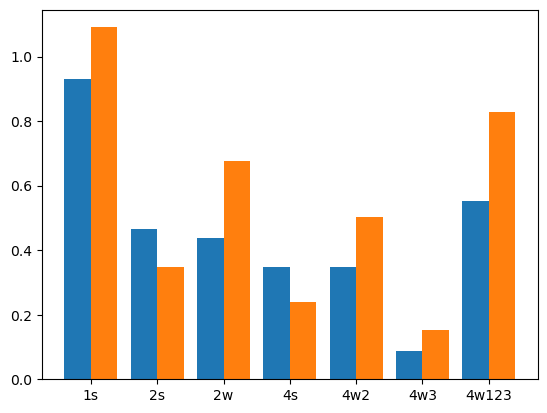

In [71]:
print(all_last_taps)
print(alphas)
labels = ['0', '1s', '2s', '2w', '4s', '4w2', '4w3', '4w123']
x = np.arange(len(all_e_times)-1)
plt.bar(x, alphas[0,1:], width = .4)
plt.bar(x+.4, alphas[1,1:], width = .4)
plt.xticks(x + .2, labels[1:])

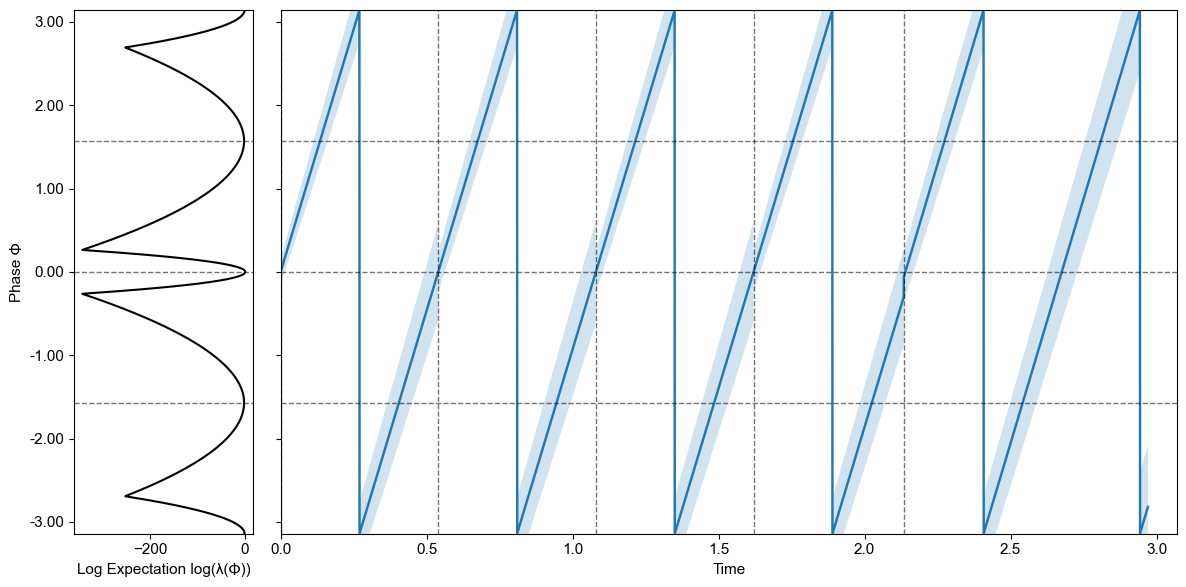

and


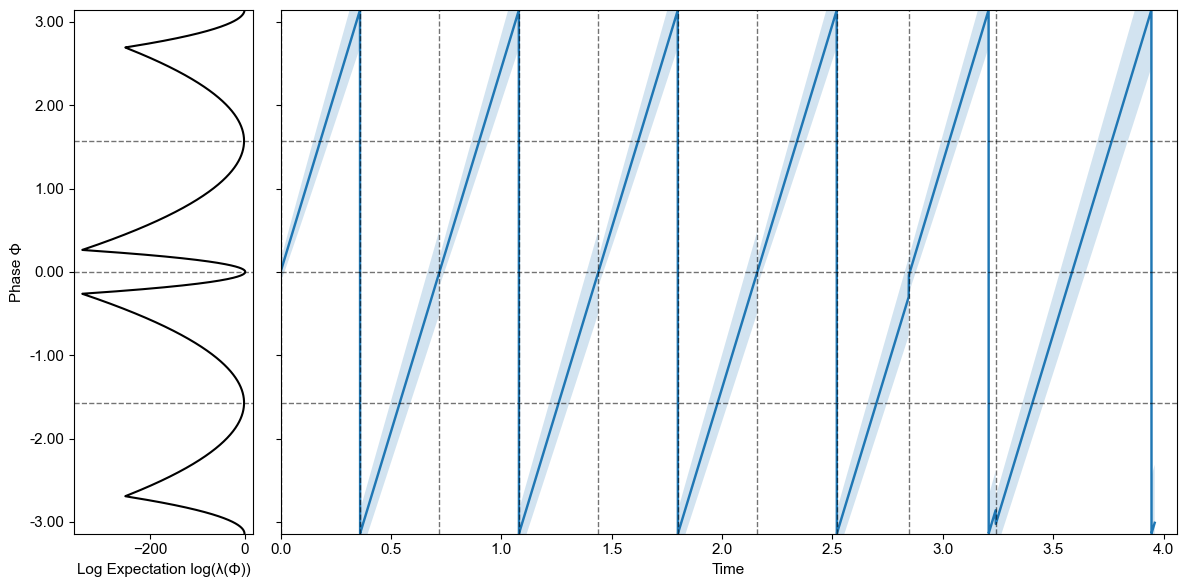

0.3

In [175]:
_plot(models[1])
print('and')
_plot(models[8+2])
models[0].params.sigma_phi

Running WIPPET... (n=0)
Running WIPPET... (n=1)
Running WIPPET... (n=2)
Running WIPPET... (n=3)
Running WIPPET... (n=4)
Running WIPPET... (n=5)
Running WIPPET... (n=6)
Running WIPPET... (n=7)
Running WIPPET... (n=0)
Running WIPPET... (n=1)
Running WIPPET... (n=2)
Running WIPPET... (n=3)
Running WIPPET... (n=4)
Running WIPPET... (n=5)
Running WIPPET... (n=6)
Running WIPPET... (n=7)


([<matplotlib.axis.XTick at 0x133af5190>,
 [Text(0.2, 0, '1s'),
  Text(1.2, 0, '2s'),
  Text(2.2, 0, '2w'),
  Text(3.2, 0, '4s'),
  Text(4.2, 0, '4w2'),
  Text(5.2, 0, '4w3'),
  Text(6.2, 0, '4w123')])

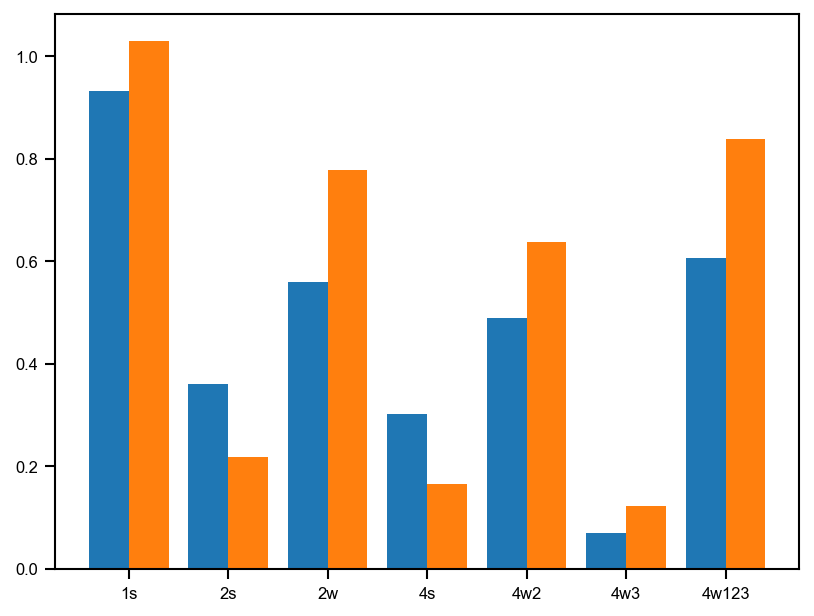

In [47]:

p_ = PIPPET.PIPPETParams()
p_.dt = 0.0002
p_.overtime = np.pi/10.

p_.mu_0 = 0
p_.V_0 = 0.001
p_.V_theta_0 = .001
p_.lambda_0 = 0.01


p_.eta_mu = 0.0
p_.eta_V = 0.0


p_.theta_p = 1.0
p_.k = 0.0

p_.sigma_theta = 0.1

sigma_phi_0 = 0.3




strong_var = .006
strong_lambda = .2

med_var = .02
med_lambda = .01

weak_var = .3
weak_lambda = .01

e_means   = np.array([0,np.pi/2, np.pi, 3*np.pi/2])
e_vars    = np.array([strong_var, weak_var, med_var, weak_var])
e_lambdas = np.array([strong_lambda, weak_lambda, med_lambda, weak_lambda])



delta = .2
all_e_times = [np.array([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi]),
               np.array([0, 2*np.pi, 4*np.pi, 6*np.pi, 8*np.pi-delta]),
               np.array([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi, 6*np.pi, 7*np.pi, 8*np.pi-delta, 9*np.pi]),
               np.array([0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi, 5*np.pi, 6*np.pi, 7*np.pi, 8*np.pi, 9*np.pi-delta]),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi-delta, 17*np.pi/2, 9*np.pi, 19*np.pi/2]))),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2, 9*np.pi-delta, 19*np.pi/2]))),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2, 9*np.pi, 19*np.pi/2-delta]))),
               np.concatenate((np.arange(0, 8*np.pi, np.pi/2), np.array([8*np.pi, 17*np.pi/2-delta, 9*np.pi-delta, 19*np.pi/2-delta])))]


labels = ['0', '1s', '2s', '2w', '4s', '4w2', '4w3', '4w123']
all_periods = [.540, .720]

all_last_taps = np.zeros([len(all_periods),len(all_e_times)]) 

alphas = np.zeros([len(all_periods),len(all_e_times)]) 

models = []
for j in range(len(all_periods)):
    for i in range(len(all_e_times)):    
        p_now = copy.deepcopy(p_)
        e_times = all_e_times[i] /(2*np.pi) *all_periods[j]
        #print(e_times)
        p_now.theta_0 = 2*np.pi/all_periods[j]
        p_now.sigma_phi = sigma_phi_0#*.54/all_periods[j] ###
        p_now.overtime = all_periods[j]*5.5-e_times[-1]
        e_vars_tmp = e_vars * (.54/all_periods[j])**2 ###
        p_now.add(e_times, e_means, e_vars_tmp, e_lambdas, '')
        print('Running WIPPET... (n={})'.format(i))
        m = PIPPET.oscPATIPPET(p_now)
        m.run()
        #utils.plot_everything(m)
        beats = m.ts[np.where(np.logical_and(m.mu_s[1:]>0 , m.mu_s[:-1]<0))]
        all_last_taps[j, i] = beats[-1]
        models.append(m)
    alphas[j,:] = (all_last_taps[j,0] - all_last_taps[j,:])  /(delta/(2*np.pi) *all_periods[j])

labels = ['0', '1s', '2s', '2w', '4s', '4w2', '4w3', '4w123']
x = np.arange(len(all_e_times)-1)
plt.bar(x, alphas[0,1:], width = .4)
plt.bar(x+.4, alphas[1,1:], width = .4)
plt.xticks(x + .2, labels[1:])

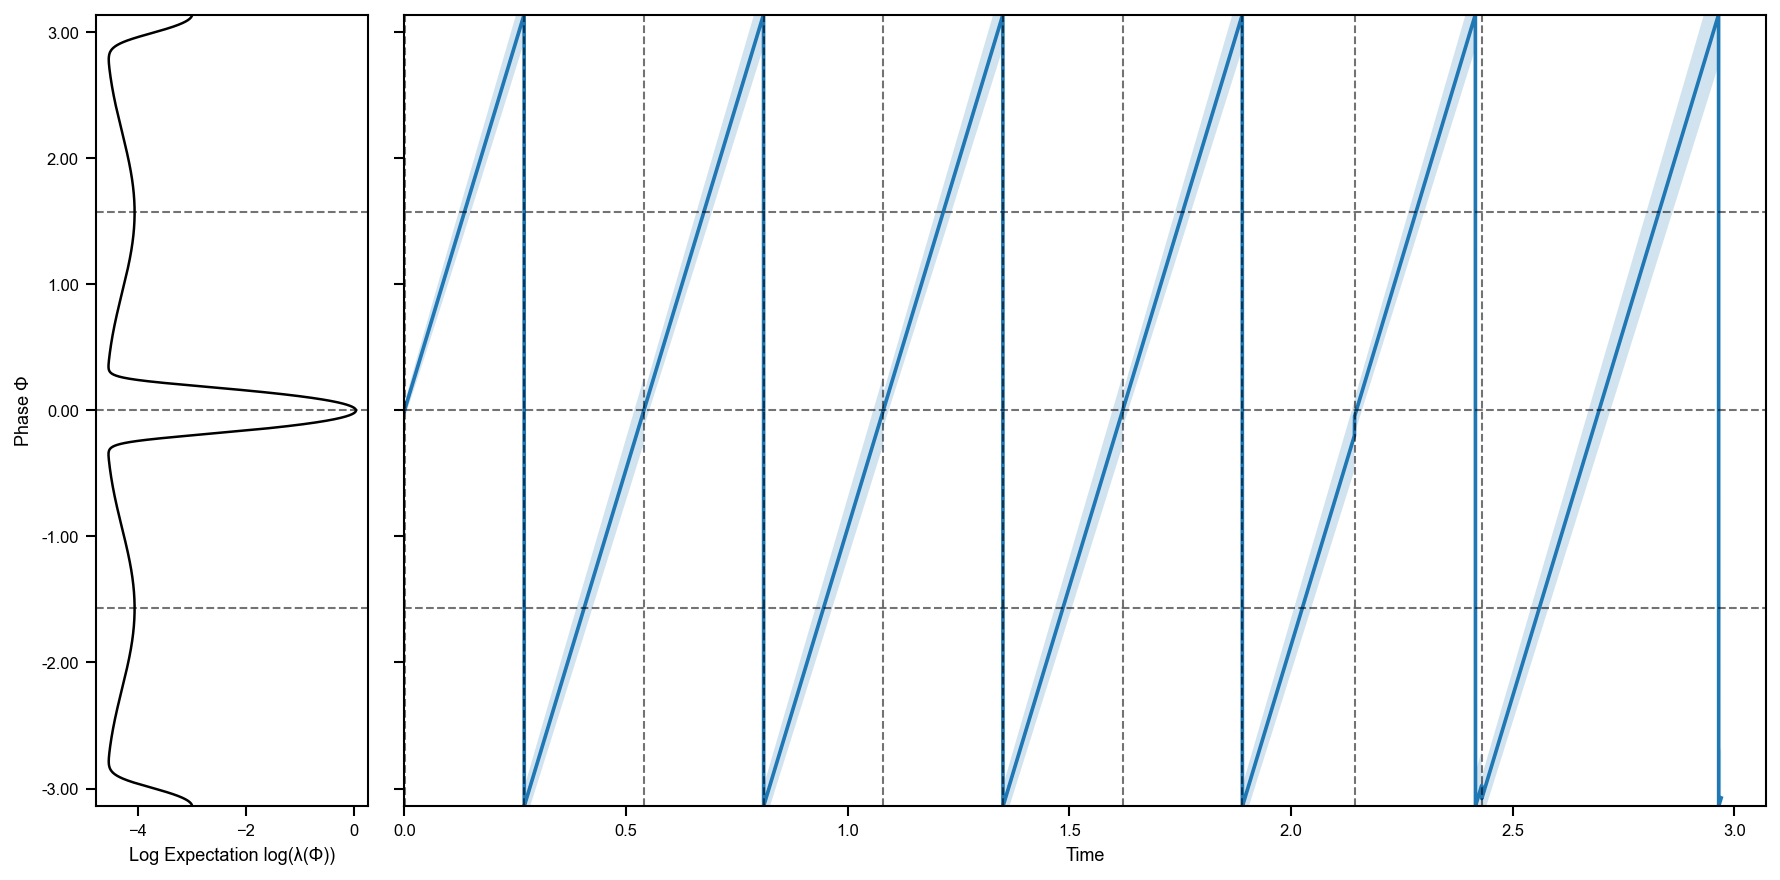

and


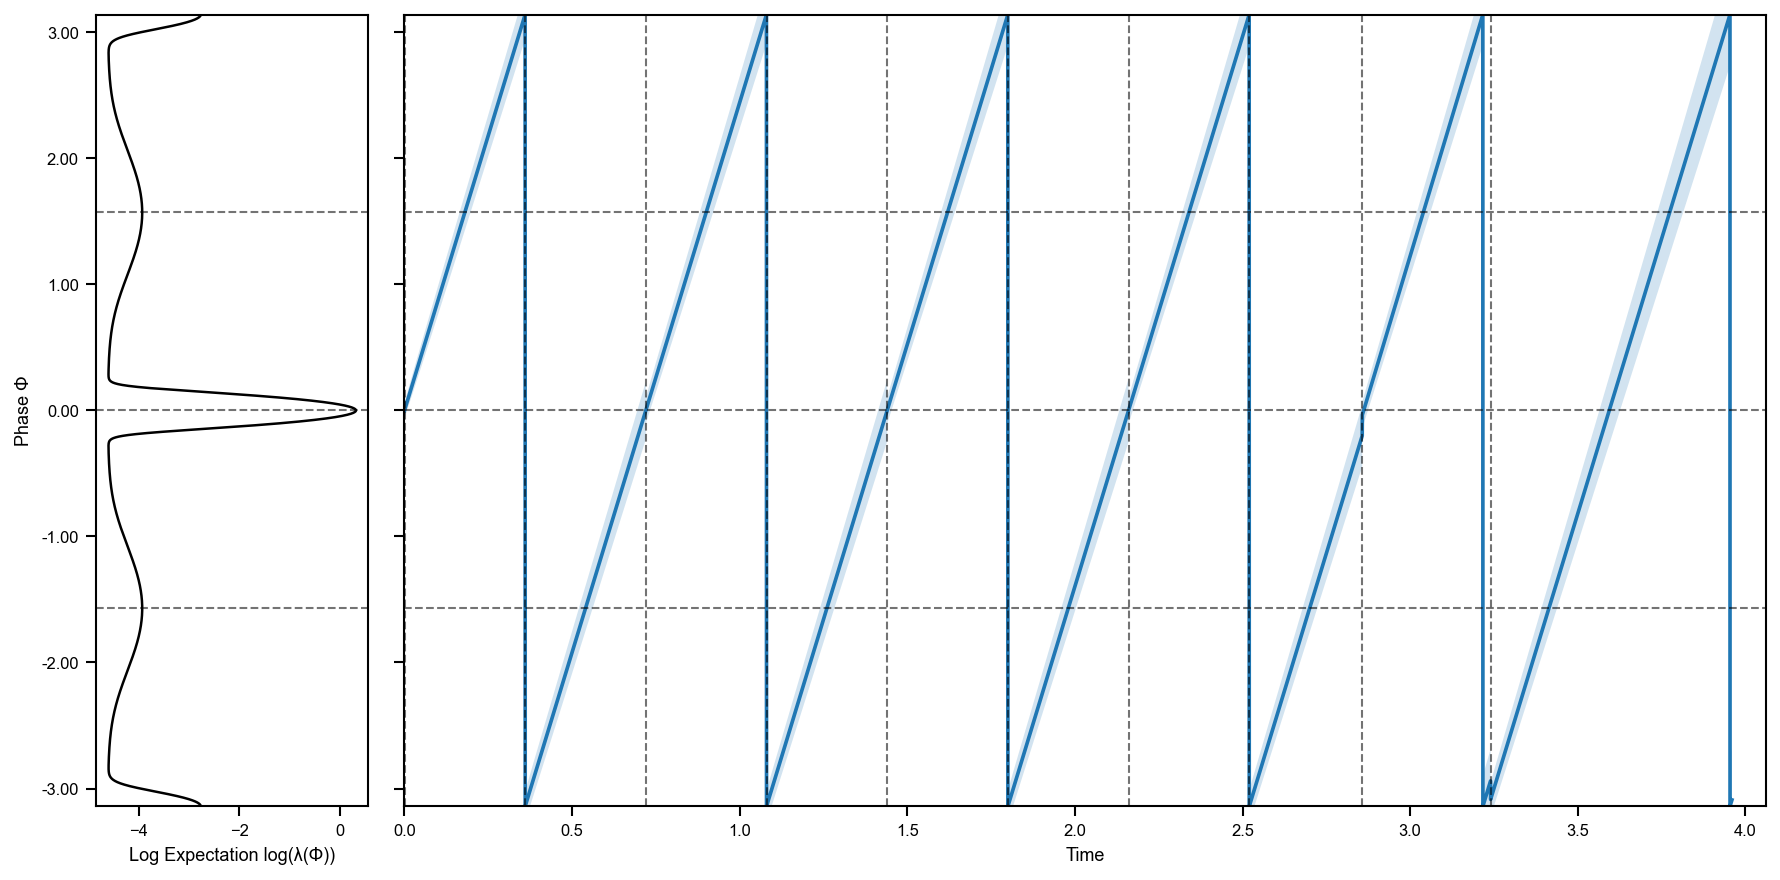

In [40]:
_plot(models[2])
print('and')
_plot(models[8+2])

In [33]:
a = np.arange(0, 6*np.pi, np.pi/2)
b = np.array([6*np.pi-delta, 13*np.pi/2, 7*np.pi, 15*np.pi/2])

np.concatenate((a,b))

         

array([ 0.        ,  1.57079633,  3.14159265,  4.71238898,  6.28318531,
        7.85398163,  9.42477796, 10.99557429, 12.56637061, 14.13716694,
       15.70796327, 17.27875959, 18.74955592, 20.42035225, 21.99114858,
       23.5619449 ])

# TICS rhythm

Running WIPPET...


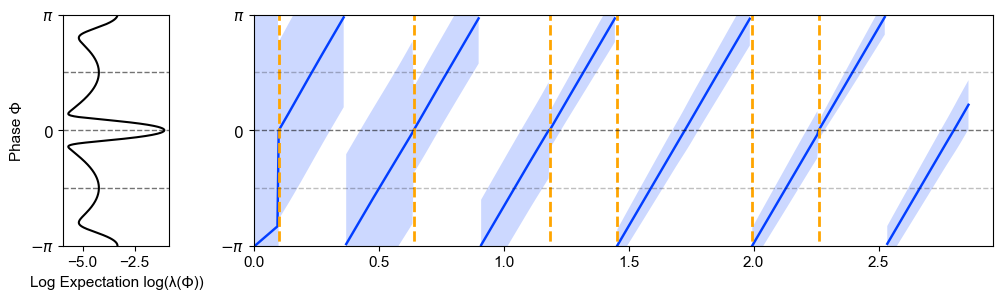

In [90]:

p_ = PIPPET.PIPPETParams()
p_.dt = 0.005
p_.overtime = np.pi/5.

p_.mu_0 = 0
p_.V_0 = 200
p_.sigma_phi = 0.2
p_.tau = 2*np.pi/.54
p_.sigma_phi = 0.4

p_.tempo_scaling = True

#0.00012346 0.00246914 0.00037037 0.00246914

#strong_var = .01
strong_var = 0.0001
strong_lambda = .1

#med_var = .03
med_var = 0.0004
med_lambda = .02

#weak_var = .2
weak_var = 0.0025
weak_lambda = .02

e_means   = np.array([0,np.pi/2, np.pi, 3*np.pi/2])
e_vars    = np.array([strong_var, weak_var, med_var, weak_var])
e_lambdas = np.array([strong_lambda, weak_lambda, med_lambda, weak_lambda])

delta = 0
per = .54
e_times = (np.array([0, per, 2*per, 5*per/2+delta, 7*per/2+delta, 4*per+delta])+.1 )       

p_now = copy.deepcopy(p_)

#p_now.overtime = 2 - delta
p_now.overtime = .7 + 4*.54 - e_times[-1]
p_now.add(e_times, e_means, e_vars, e_lambdas, lambda_0, '')
print('Running WIPPET...')
m = PIPPET.cPIPPET(p_now)
m.run()
f = utils.plot_cPIPPET(m, width_ratios=(1, 7), figsize = [12,3])

Running WIPPET...


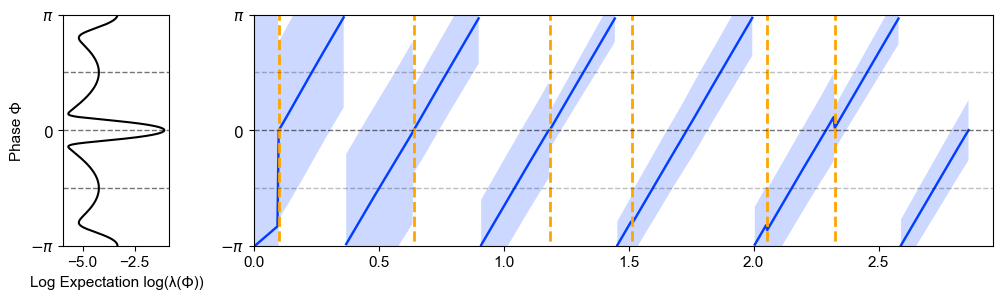

In [91]:
delta = .06
e_times = (np.array([0, per, 2*per, 5*per/2+delta, 7*per/2+delta, 4*per+delta])+.1 )         
p_now = copy.deepcopy(p_)

#p_now.overtime = 2 - delta
p_now.overtime = .7 + 4*.54 - e_times[-1]
p_now.add(e_times, e_means, e_vars, e_lambdas, lambda_0, '')
print('Running WIPPET...')
m = PIPPET.cPIPPET(p_now)
m.run()
f = utils.plot_cPIPPET(m, width_ratios=(1, 7), figsize = [12,3])

Running WIPPET...


(0.0, 2.86)

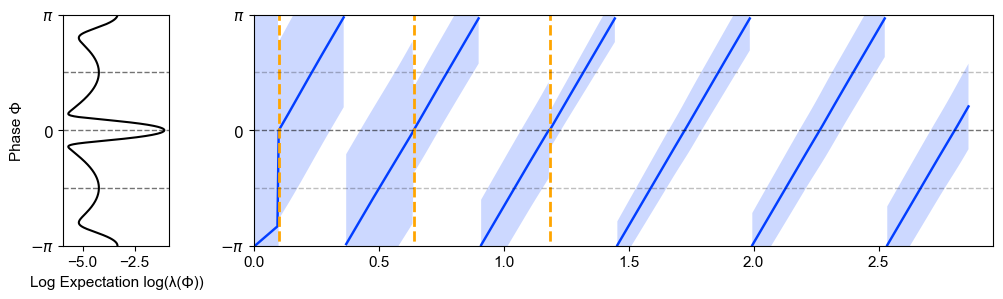

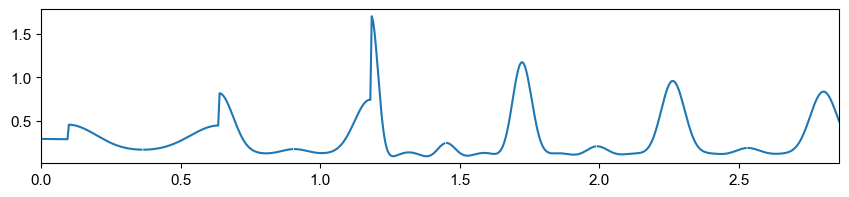

In [93]:
e_times = (np.array([0, per, 2*per])+.1 )         
p_now = copy.deepcopy(p_)

#p_now.overtime = 2 - delta
p_now.overtime = .7 + 4*.54 - e_times[-1]
p_now.add(e_times, e_means, e_vars, e_lambdas, lambda_0, '')
print('Running WIPPET...')
m = PIPPET.cPIPPET(p_now)
m.run()
f = utils.plot_cPIPPET(m, width_ratios=(1, 7), figsize = [12,3])

hazard = np.zeros(len(m.mu_s))
for i in range(0, len(m.mu_s)):
    hazard[i]= m.streams[0].zlambda(m.mu_s[i], m.V_s[i], m.params.tau)
plt.figure(figsize = (10.3,2))
plt.plot(m.ts, hazard)
plt.xlim(0, np.max(m.ts))